In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

In [28]:
def Program_3():
    ############## Parameters
    global c, xmu, eps0, asize
    global nx, ny, nt, mxst, mxnd, myst, mynd
    global dt, ds
    global Ez, Hx, Hy #Create E and H field components.
    # global data type enables the global scope of the variables
    # within the code.Unlike global variables they can not be accessed
    # outside the code
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db # Define material based coefficients
    global c1,c2,c3,c4,c5
    global Ez1, Ez2, Ez3, Ez4, Ez5 # For Bubbling of E-fields in Liao ABC
    global ABC_order # Order of the Liao ABC 
    global strip
    
    c = 2.99792458e8;
    xmu = 4*math.pi*1e-7;
    eps0 = 8.854187817e-12;
    asize = 5; # Space Dimension in meters
    nx = 80;      # Number of cells in x-direction
    ny = 100;     # Number of cells in y-direction
    nt = 400;     # Number of time steps
    mxst = 17;    # Start of PEC section in x-direction
    mxnd = 49;    # End of PEC section in x-direction
    myst = 33;    # Start of PEC section in y-direction
    mynd = 65;    # End of PEC section in y-direction
    strip=30
    
    Ez = np.zeros((nx, ny)) # z-component of E-field
    Hx = np.zeros((nx, ny)) # x-component of H-field
    Hy = np.zeros((nx, ny)) # y-component of H-field

    mediaEz = np.ones((nx, ny)) # z-component of E-field
    mediaHx = np.ones((nx, ny)) # x-component of H-field
    mediaHy = np.ones((nx, ny)) # x-component of H-field

    Ca = np.zeros((2, 1)) # x-component of H-field
    Cb = np.zeros((2, 1)) # x-component of H-field
    Da = np.zeros((2, 1)) # x-component of H-field
    Db = np.zeros((2, 1)) # x-component of H-field

    Ez1 = np.zeros((nx,ny));
    Ez2 = np.zeros((nx,ny));
    Ez3 = np.zeros((nx,ny));
    Ez4 = np.zeros((nx,ny));
    Ez5 = np.zeros((nx,ny));
    
    ds = asize/(mxnd - mxst - 1); # Length Increment
    dt = ds/(c*math.sqrt(2)); # Stability Condition

In [29]:
def define_media(iflaga):
    global nx, ny, mxst, mxnd, myst, mynd
    global mediaEz, mediaHx, mediaHy
    if (iflaga == 2):
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst-1 and i <= mxnd-1):
                    if (j >= myst-1 and j <= mynd-1):
                        mediaEz[i, j] = 2
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst-1 and i <= mxnd-1):
                    if (j >= myst-1 and j <= mynd - 2):
                        mediaHx[i, j] = 2
        for i in range(nx):
            for j in range(ny):
                if (i >= mxst and i <= mxnd - 1):
                    if (j >= myst-1 and j <= mynd-1):
                        mediaHy[i, j] = 2

In [30]:
def define_coefficients():
    global Ca, Cb, Da, Db
    global xmu, eps0, dt, ds
    dte = dt/(ds*eps0)
    dtm = dt/(ds*xmu)
    Da[0] = 1
    Db[0] = dtm
    Ca[0] = 1
    Cb[0] = dte
    Da[1] = 0
    Db[1] = 0
    Ca[1] = 0
    Cb[1] = 0

In [31]:
def define_Liao():
    global c1,c2, c3, c4, c5 ; # Define material based coefficients
    global ABC_order # Order of the Liao ABC 
    if ABC_order == 5:
        c1=5;
        c2=10;
        c3=10;
        c4=5;
        c5=1;
    elif ABC_order == 4:
        c1 = 4;
        c2 = 6;
        c3 = 4;
        c4 = 1;
        c5 = 0;
    elif ABC_order == 3:
        c1 = 3;
        c2 = 3;
        c3 = 1;
        c4 = 0;
        c5 = 0;
    else:
        print('Error: Wrong Value')

In [32]:
def Liao_ABC():
    global c1, c2, c3, c4, c5 ; # Define material based coefficients
    global Ez ; # E and H field components.
    global Ez1, Ez2, Ez3, Ez4, Ez5 # For Bubbling of E-fields in Liao ABC
    global nx,  ny  
    global ABC_order
    for j in range(ny):
        Ez[1,j]=c1*Ez1[2,j]-c2**Ez2[3,j]+c3*Ez3[4,j]-c4*Ez4[5,j]+c5*Ez5[6,j] # left side
    for j in range(ny):
        Ez[nx-1,j]=c1*Ez1[nx-2,j]-c2*Ez2[nx-3,j]+c3*Ez3[nx-4,j]-c4*Ez4[nx-5,j]+c5*Ez5[nx-6,j]
    for i in range(2,nx-1):
        Ez[i,1]=c1*Ez1[i,2]-c2*Ez2[i,3]+c3*Ez3[i,4]-c4*Ez4[i,5]+c5*Ez5[i,6]
    for i in range(2,nx-1):
        Ez[i,ny-1]=c1*Ez1[i,ny-2]-c2*Ez2[i, ny-3]+c3*Ez3[i,ny-4]-c4*Ez4[i,ny-5]+c5*Ez5[i,ny-6] #top
    
    if ABC_order == 5:
        Ez5 = Ez4;
        Ez4 = Ez3;
        Ez3 = Ez2;
        Ez2 = Ez1;
        Ez1 = Ez;
    elif ABC_order == 4:
        Ez4 = Ez3;
        Ez3 = Ez2;
        Ez2 = Ez1;
        Ez1 = Ez;
    elif ABC_order == 3:
        Ez3=Ez2;
        Ez2=Ez1;
        Ez1=Ez;
    else:
        print('Error: Wrong Value')

In [33]:
def Source(n, sources):
    global Ezs
    if sources == 2:
        xndec = 10.0
        xn0 = 4*xndec
        Ezs = math.exp(-((n-xn0)/(xndec))**2)
    elif sources == 1:
        if ( n >=1 and n <= 10):
            Ezs = math.sin((n)*math.pi/10)
    return Ezs

In [34]:
def adv_Ez(n, sources):
    global Ez, Hx, Hy
    global mediaEz
    global Ca, Cb
    global nx, ny
    for i in range(nx):
        for j in range(ny):
            m  = int(mediaEz[i, j]-1)
            if (i == 5):
                Es= Source(n, sources)
            else:
                Es= 0     
            if (i >= 1 and j >=1):
                Ez[i, j] = Ez[i, j]*Ca[m] + Cb[m]*(Hy[i, j] - Hy[i-1, j] - (Hx[i, j] - Hx[i, j-1]))+Es
            elif (i>=1 and j == 0):
                Ez[i, j] = Ez[i, j]*Ca[m] + Cb[m]*(Hy[i, j] - Hy[i-1, j]- Hx[i, j])+Es

In [35]:
def adv_H(n):
    global Ez, Hx, Hy
    global mediaHx, mediaHy
    global Da, Db
    global nx, ny
    for i in range(nx):
        for j in range(ny-1):
            m = int(mediaHx[i, j]-1)
            Hx[i, j] = Hx[i, j]*Da[m] - Db[m]*(Ez[i, j+1] - Ez[i, j])
    for i in range(nx-1):
        for j in range(ny):
            m = int(mediaHy[i, j]-1)
            Hy[i, j] = Hy[i, j]*Da[m] + Db[m]*(Ez[i+1, j] - Ez[i, j])

In [36]:
def my_surface_plot(field):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xd = np.linspace(0, 10, 100)
    yd = np.linspace(0, 10, 80)
    [xdg, ydg] = np.meshgrid(xd, yd)
    dem3d = ax.plot_surface(xdg, ydg, field, cmap='rainbow', edgecolor='none')
    fig.colorbar(dem3d, shrink=0.5, aspect=5)

In [37]:
def my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95,iflaga, source):
    fig = plt.figure()
    plt.subplot(411)
    plt.plot(range(len(Ez_5)),Ez_5,'k')
    plt.xticks([])
    plt.legend(title='n=5', loc='best', frameon=False)
    plt.subplot(412)
    plt.plot(range(len(Ez_35)),Ez_35, 'k')
    plt.xticks([])
    plt.legend(title='n=35',loc='best', frameon=False)
    plt.subplot(413)
    plt.plot(range(len(Ez_65)),Ez_65,'k')
    plt.xticks([])
    plt.legend(title='n=65',loc='best', frameon=False)
    plt.subplot(414)
    plt.plot(range(len(Ez_95)),Ez_95,'k')
    plt.xticks([])
    plt.legend(title='n=95',loc='best', frameon=False)
    if iflaga == 1 and source == 1:
        fig.suptitle('Line Plots for E-field with no obstacle for a sinusoid source')
    elif iflaga == 2 and source == 1:
        fig.suptitle('Line Plots for E-field with a PEC box for a sinusoid source')
    elif source == 2:
        fig.suptitle('Line Plots for E-field with no obstacle for a Gaussian source')
    # plt.title('Line Plots for E-field with no obstacle for a sinusoid source')
    plt.show()

In [38]:
def zeroing():
    global nx, ny
    global Ez, Hx, Hy
    global mediaEz, mediaHx, mediaHy
    global Ca, Cb, Da, Db

    Ez = np.zeros((nx, ny))
    Hx = np.zeros((nx, ny))
    Hy = np.zeros((nx, ny))
    
    Ez1 = np.zeros(nx,ny);
    Ez2 = np.zeros(nx,ny);
    Ez3 = np.zeros(nx,ny);
    Ez4 = np.zeros(nx,ny);
    Ez5 = np.zeros(nx,ny);


    mediaEz = np.ones((nx, ny))
    mediaHx = np.ones((nx, ny))
    mediaHy = np.ones((nx, ny))

    Ca = np.zeros((2, 1))
    Cb = np.zeros((2, 1))
    Da = np.zeros((2, 1))
    Db = np.zeros((2, 1))


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


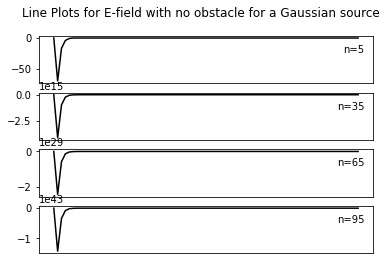

In [39]:
if __name__ == '__main__':
    Program_3()
    iflaga = 2
    define_media(iflaga)
    define_coefficients()
    source = 2
    ABC_order = 4;
    define_Liao();
    # Ez field plotting 
    for x in range(nt):
        n = x+1
        adv_Ez(n, source)
        Liao_ABC()
        adv_H(n)
        #if n % 5 == 0:
        #    my_surface_plot(Ez)
        #    plt.title('3D plot of $E_z$ with PEC box')
        #    plt.show()
        if n == 5:
            Ez_5 = copy.deepcopy(Ez[:, strip])
        elif n == 35:
            Ez_35 = copy.deepcopy(Ez[:, strip])
        elif n == 65:
            Ez_65 = copy.deepcopy(Ez[:, strip])
        elif n == 95:
            Ez_95 = copy.deepcopy(Ez[:, strip])

    my_line_plot(Ez_5, Ez_35, Ez_65, Ez_95, iflaga, source)